In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import os

In [4]:
ls

Compiled_bandrel.csv      CompiledResults2/        participants.tsv
Compiled_bandrel.csvOrig  CompiledResults2.tar.gz  SensoryHists.png
CompiledResults/          CompiledResults.tar.gz


In [3]:
os.chdir(os.environ['HOME']+'/CAMCAN_ageValpha')

In [6]:
#dframe=pd.read_csv('Merged_prelim_results_102820.csv')
# dframe=pd.read_csv('Merged_demog_parcelstats.csv')
parceldat = pd.read_csv('Compiled_bandrel.csv')
demographics = pd.read_csv('participants.tsv', delimiter='\t')

In [8]:
parceldat['participant_id']='sub-'+parceldat.HASH_ID

In [10]:
parceldat.head()

,Parcel,"[1, 3]","[3, 6]","[8, 12]","[13, 35]","[35, 55]",AlphaPeak,HASH_ID,participant_id
0,bankssts-lh,0.096746,0.032426,0.042377,0.015600,0.002189,11.275084,CC110033,sub-CC110033
1,caudalanteriorcingulate-lh,0.103553,0.034024,0.024091,0.013850,0.003946,11.045830,CC110033,sub-CC110033
2,caudalmiddlefrontal-lh,0.101195,0.034861,0.017976,0.013742,0.004404,NaN,CC110033,sub-CC110033
3,cuneus-lh,0.048557,0.016545,0.086184,0.012485,0.003347,10.357627,CC110033,sub-CC110033
4,entorhinal-lh,0.107099,0.034065,0.029936,0.011088,0.003462,11.350128,CC110033,sub-CC110033


In [11]:
demographics.head()

,participant_id,age,hand,gender_text,gender_code,tiv_cubicmm
0,sub-CC110033,24,90.0,MALE,1,1411686
1,sub-CC110037,18,89.0,MALE,1,1391950
2,sub-CC110045,24,100.0,FEMALE,2,1384737
3,sub-CC110056,22,100.0,FEMALE,2,1284916
4,sub-CC110062,20,58.0,MALE,1,1581701


In [12]:
dframe=pd.merge(demographics, parceldat, on='participant_id')

In [13]:
dframe.columns

Index(['participant_id', 'age', 'hand', 'gender_text', 'gender_code',
       'tiv_cubicmm', 'Parcel', '[1, 3]', '[3, 6]', '[8, 12]', '[13, 35]',
       '[35, 55]', 'AlphaPeak', 'HASH_ID'],
      dtype='object')

In [14]:
def filter_parcel_data(dframe, parcel_name=None, column_name=None):
    tmp=dframe[dframe.Parcel==parcel_name]
#     return tmp[[column_name, 'AGE', 'SEX']].dropna()
    return tmp[[column_name, 'age', 'gender_text']].dropna()

In [15]:
rdframe = pd.DataFrame(columns=['parcel_name', 'coeff','rsquared_adj'])

In [16]:
rdframe.parcel_name = dframe.Parcel.unique()

In [17]:
rdframe

,parcel_name,coeff,rsquared_adj
0,bankssts-lh,NaN,NaN
1,caudalanteriorcingulate-lh,NaN,NaN
2,caudalmiddlefrontal-lh,NaN,NaN
3,cuneus-lh,NaN,NaN
4,entorhinal-lh,NaN,NaN
...,...,...,...
63,superiorparietal-rh,NaN,NaN
64,superiortemporal-rh,NaN,NaN
65,supramarginal-rh,NaN,NaN
66,temporalpole-rh,NaN,NaN


In [18]:
for idx, row in rdframe.iterrows():
    parc = row['parcel_name']
    tmp=filter_parcel_data(dframe, parcel_name=parc, column_name='AlphaPeak')
    results = smf.ols('AlphaPeak ~ age', data=tmp).fit()
    rdframe.loc[idx, 'rsquared_adj']=results.rsquared_adj
    rdframe.loc[idx, 'coeff']=results.params['age']
    

In [19]:
rdframe.parcel_name.values

array(['bankssts-lh', 'caudalanteriorcingulate-lh',
       'caudalmiddlefrontal-lh', 'cuneus-lh', 'entorhinal-lh',
       'frontalpole-lh', 'fusiform-lh', 'inferiorparietal-lh',
       'inferiortemporal-lh', 'insula-lh', 'isthmuscingulate-lh',
       'lateraloccipital-lh', 'lateralorbitofrontal-lh', 'lingual-lh',
       'medialorbitofrontal-lh', 'middletemporal-lh', 'paracentral-lh',
       'parahippocampal-lh', 'parsopercularis-lh', 'parsorbitalis-lh',
       'parstriangularis-lh', 'pericalcarine-lh', 'postcentral-lh',
       'posteriorcingulate-lh', 'precentral-lh', 'precuneus-lh',
       'rostralanteriorcingulate-lh', 'rostralmiddlefrontal-lh',
       'superiorfrontal-lh', 'superiorparietal-lh', 'superiortemporal-lh',
       'supramarginal-lh', 'temporalpole-lh', 'transversetemporal-lh',
       'bankssts-rh', 'caudalanteriorcingulate-rh',
       'caudalmiddlefrontal-rh', 'cuneus-rh', 'entorhinal-rh',
       'frontalpole-rh', 'fusiform-rh', 'inferiorparietal-rh',
       'inferiortemp

In [ ]:
#rdframe.to_csv('Prelim_coeffs_Age2.csv')

In [35]:
tmp=filter_parcel_data(dframe, parcel_name='inferiortemporal-lh', column_name='AlphaPeak')

In [36]:
results = smf.ols('AlphaPeak ~ age', data=tmp).fit()

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              AlphaPeak   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           4.61e-08
Time:                        14:01:46   Log-Likelihood:                -338.89
No. Observations:                 255   AIC:                             681.8
Df Residuals:                     253   BIC:                             688.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4585      0.167     62.560      0.0

In [23]:
import pylab

Text(0, 0.5, 'AlphaPeak')

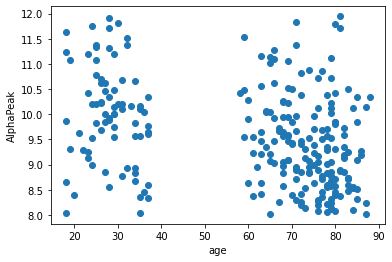

In [38]:
pylab.scatter(tmp['age'], tmp['AlphaPeak'])
pylab.xlabel('age'); pylab.ylabel('AlphaPeak')

(array([29., 59., 74., 69., 78., 66., 73., 74., 86., 45.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <BarContainer object of 10 artists>)

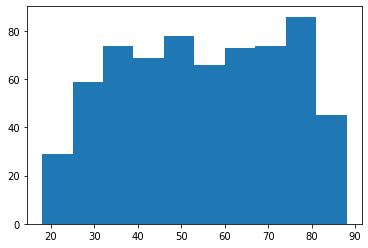

In [25]:
pylab.hist(demographics.age)

(array([1428., 3264., 1904.,    0.,    0.,  340., 2244., 4284., 5372.,
        2584.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <BarContainer object of 10 artists>)

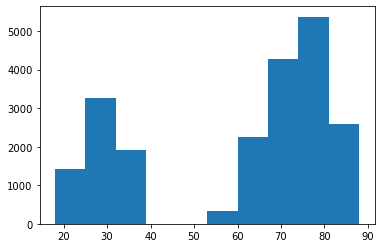

In [27]:
pylab.hist(dframe.age)

In [33]:
rdframe

,parcel_name,coeff,rsquared_adj
0,bankssts-lh,-0.0136088,0.0876725
1,caudalanteriorcingulate-lh,-0.0108845,0.0636657
2,caudalmiddlefrontal-lh,-0.00314295,-0.00248981
3,cuneus-lh,-0.0149252,0.136956
4,entorhinal-lh,-0.0175722,0.183863
...,...,...,...
63,superiorparietal-rh,-0.00938723,0.0471131
64,superiortemporal-rh,-0.00818938,0.0287532
65,supramarginal-rh,-0.00807795,0.028811
66,temporalpole-rh,-0.0142958,0.102821


In [34]:
rdframe.to_csv('Alpha_vs_age.csv', index=False)